In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


References:
<https://www.kaggle.com/osemds/first-titanic-and-also-kaggle-attempt>; https://www.kaggle.com/startupsci/titanic-data-science-solutions.

Imports

First import the resources (will be adding more while would need it)

In [2]:
# imports 
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

Charge the data in order to overview the situation

In [3]:
train_path = "/kaggle/input/titanic/train.csv"
test_path  = "/kaggle/input/titanic/test.csv"
submission_path = "/kaggle/input/titanic/gender_submission.csv"

train = pd.read_csv(train_path)
test = pd.read_csv(test_path)
submission = pd.read_csv(submission_path)

In [4]:
print('Training Data')
train.head()

Training Data


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#Some info about the training data

print('1. General information about training:')
train.info()
print('----------------------------------------------------------')
print('2. Percentage of NA per property sorted:')
p = (train.isna().sum()/len(train)*100).sort_values(ascending=False)
print(p)
print('----------------------------------------------------------')
print('3. Unique values for duplications and other useful info:')
u = train.nunique().sort_values()
print(u)

1. General information about training:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
----------------------------------------------------------
2. Percentage of NA per property sorted:
Cabin          77.104377
Age            19.865320
Embarked        0.224467
PassengerId     0.000000
Survi

In [6]:
print('Test Data')
test.head()

Test Data


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
#Some info about the test data

print('1. General information about test:')
test.info()
print('----------------------------------------------------------')
print('2. Percentage of NA per property sorted:')
p = (test.isna().sum()/len(test)*100).sort_values(ascending=False)
print(p)

1. General information about test:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
----------------------------------------------------------
2. Percentage of NA per property sorted:
Cabin          78.229665
Age            20.574163
Fare            0.239234
PassengerId     0.000000
Pclass          0.000000
Name            0.000000
S

In [8]:
print(submission)

     PassengerId  Survived
0            892         0
1            893         1
2            894         0
3            895         0
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]


Now lets see some plots that will help to figure out some relations in the data

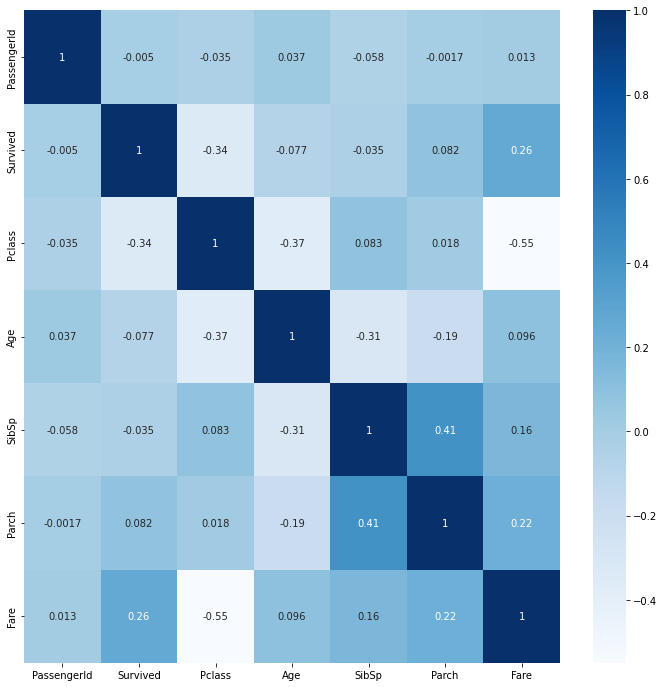

In [9]:
# Heatmap 
plt.figure(figsize=(12,12))
sns.heatmap(train.corr(), annot=True, cmap='Blues')
plt.show()

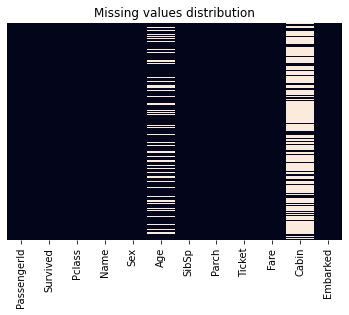

In [10]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False)
plt.title('Missing values distribution')
plt.show()

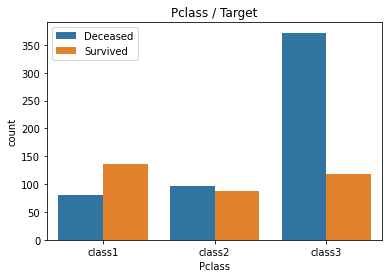

In [11]:
# Graphic
Pclass=['class1','class2','class3']
ax=sns.countplot(data=train,x='Pclass',hue='Survived')
plt.xticks(ticks = [0,1,2], labels = Pclass)
plt.title("Pclass / Target")
plt.legend(['Deceased', 'Survived'])
plt.show()

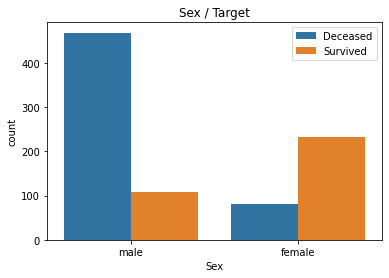

In [12]:
Sex=['male','female']
ax=sns.countplot(data=train,x='Sex',hue='Survived')
plt.xticks(ticks = [0,1], labels = Sex)
plt.title("Sex / Target")
plt.legend(['Deceased', 'Survived'])
plt.show()

Data cleaning

Have the following situation:

Missing values:

* Case 1: 'Cabin' 77% of missing values. As long as there is 3/4 of the data missing if would decide to use the data it would not be trustable, so the most fair way to proceed is to drop this one;

* Case 2: 'Age' with 20% of missing values. With a 20% of missing values should try to fill following some strategy in order to apply the filling closer to what would be: in view of Pclass and Sex have no missing values as well as maybe impact directly on the survivors number, they will be use as reference to fill some missing values;

* Case 3: 'Embarked' with 0.2% of missing values. Less than a 0.5% of missing values let to take a different strategy as long as filling the missing values would affect nearly nothing to results. So in this case will drop the cases where this property is not present;

* Case 4: 'Fare' with 0.2% of missing values in test (less than a 0.5%). However, in this case will apply the same strategy of Case2, considering that it is not object and it hasn´t missing values in training.

Categorical values

Also have categorical variables that need to be encoded or dropped:

* Case 5: 'Sex' as long as it only has 2 possibles values, can do it manually or by a label encoder;

* Case 6: 'Name' This property doesn't give useful info so drop is the best option;

* Case 7: 'Ticket' This property doesn't give useful info. Drop is the best option too;

* Case 8: 'Cabin' drop by missing 70% of values, also not very useful info at first sight. Maybe with less missing could be useful as "travellers on stern side of the boat survived more than travellers on bow side", but 77.1% is too much missing;

* Case 9: 'Embarked' has 3 possible values, can do it manually or by a label encoder.

In [13]:
# Check the values of Sex for manual replacement
print('Training:')
print(train['Sex'].value_counts())
print('----------------------------------------')
print('Test:')
print(test['Sex'].value_counts())

Training:
male      577
female    314
Name: Sex, dtype: int64
----------------------------------------
Test:
male      266
female    152
Name: Sex, dtype: int64


In [14]:
# Check the values of Embarked for manual replacement
print('Training:')
print(train['Embarked'].value_counts())
print('----------------------------------------')
print('Test:')
print(test['Embarked'].value_counts())

Training:
S    644
C    168
Q     77
Name: Embarked, dtype: int64
----------------------------------------
Test:
S    270
C    102
Q     46
Name: Embarked, dtype: int64


In [15]:
# Check the values of Fare for, eventually, manual replacement into categories
train['Fare'].value_counts(bins=5)

(-0.513, 102.466]     838
(102.466, 204.932]     33
(204.932, 307.398]     17
(409.863, 512.329]      3
(307.398, 409.863]      0
Name: Fare, dtype: int64

In [16]:
def cleanData(data):
    
    # Data missing and categorical to drop: Cases 1, 6, 7 and 8
    data.drop(['Cabin','Name','Ticket'], axis=1, inplace=True)

    # Data missing Case2
    data['Age'] = data.groupby(['Pclass','Sex'])['Age'].transform(lambda x: x.fillna(x.median()))
    
    # FARE Data missing in test: Case4
    data['Fare'] = data.groupby(['Pclass','Sex'])['Fare'].transform(lambda x: x.fillna(x.median()))

    # Data missing Case3
    data.dropna(axis=0, subset=['Embarked'], inplace=True)
    
    # Categorical Data
    le = preprocessing.LabelEncoder()
    
    # Sex Case5
    data['Sex'].replace({'male':0, 'female':1}, inplace=True)
    
    # Embarked Case9
    data['Embarked'].replace({'S':0, 'C':1, 'Q':2}, inplace=True)
    
    return data

In [17]:
clean_train = cleanData(train)
clean_test = cleanData(test)

Check cleaning

After cleaning data, have to check that all is going well:

In [18]:
print("Training after cleaning:")
clean_train.head()

Training after cleaning:


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,0
1,2,1,1,1,38.0,1,0,71.2833,1
2,3,1,3,1,26.0,0,0,7.9250,0
3,4,1,1,1,35.0,1,0,53.1000,0
4,5,0,3,0,35.0,0,0,8.0500,0


In [19]:
print("Training after cleaning:")
clean_train.info()

Training after cleaning:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    int64  
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 69.5 KB


In [20]:
print("Test after cleaning:")
clean_test.head()

Test after cleaning:


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,0,34.5,0,0,7.8292,2
1,893,3,1,47.0,1,0,7.0000,0
2,894,2,0,62.0,0,0,9.6875,2
3,895,3,0,27.0,0,0,8.6625,0
4,896,3,1,22.0,1,1,12.2875,0


In [21]:
print("Test after cleaning:")
clean_test.info()

Test after cleaning:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         418 non-null    float64
 7   Embarked     418 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 29.4 KB


Modeling

With the data cleaned proceed to train and test models.

In [22]:
# Set X and y
y = train['Survived']
X = pd.get_dummies(train.drop('Survived', axis=1))

# # Polynomial features
# features = PolynomialFeatures(degree=2)
# X = features.fit_transform(X)

# # Standard Scaler
# sc = StandardScaler()
# X = sc.fit_transform(X)

# Split model train test data
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.2, random_state=42)

In [23]:
def fitAndPredict(model):
    """The following code makes faster to evaluate a model 
    automating the fit and accuracy process"""
    
    model.fit(X_train, y_train)
    prediction = model.predict(X_val)
    return accuracy_score(y_val, prediction)

In [24]:
#Lets some models
model1 = LogisticRegression(solver='liblinear', random_state=42)
model2 = GradientBoostingClassifier(min_samples_split=20, min_samples_leaf=60, max_depth=4, max_features=5)
model3 = RandomForestClassifier(n_estimators=28, max_depth=12, random_state=1)
model4 = SGDClassifier()
model5 = SVC()
model6 = KNeighborsClassifier(n_neighbors = 3)
model7 = DecisionTreeClassifier()

models = [model1, model2, model3, model4, model5, model6, model7]
i = 0
for model in models:
    i +=1
    print("Model ", i,":", model)
    print("ACC: ", fitAndPredict(model))

Model  1 : LogisticRegression(random_state=42, solver='liblinear')
ACC:  0.797752808988764
Model  2 : GradientBoostingClassifier(max_depth=4, max_features=5, min_samples_leaf=60,
                           min_samples_split=20)
ACC:  0.8314606741573034
Model  3 : RandomForestClassifier(max_depth=12, n_estimators=28, random_state=1)
ACC:  0.7921348314606742
Model  4 : SGDClassifier()
ACC:  0.6573033707865169
Model  5 : SVC()
ACC:  0.6348314606741573
Model  6 : KNeighborsClassifier(n_neighbors=3)
ACC:  0.5955056179775281
Model  7 : DecisionTreeClassifier()
ACC:  0.7303370786516854


In [25]:
def enhance_model(max_features):
    """This function makes faster to evaluate a model wiht its parameters 
    automating the fit and accuracy process"""

    model_chosen = GradientBoostingClassifier(min_samples_split=30, min_samples_leaf=60, max_depth=3, max_features=max_features)
    model_chosen.fit(X_train, y_train)
    prediction = model_chosen.predict(X_val)
    return accuracy_score(y_val, prediction)

print("Enhancing the model:")

for max_features in [4,5,6,7,8]:
    Model_accuracy = enhance_model(max_features)
    print("max_features: %d  \t\t Accuracy:  %f" %(max_features, Model_accuracy))

Enhancing the model:
max_features: 4  		 Accuracy:  0.837079
max_features: 5  		 Accuracy:  0.831461
max_features: 6  		 Accuracy:  0.837079
max_features: 7  		 Accuracy:  0.837079
max_features: 8  		 Accuracy:  0.837079


In [26]:
#As long as GradientBoost is the best of the tried ones lets tune it a bit
model_enhanced = GradientBoostingClassifier(min_samples_split=60, min_samples_leaf=60, max_depth=3, max_features=4)
print("Accuracy after enhancing:")
fitAndPredict(model_enhanced)

Accuracy after enhancing:


0.8258426966292135

In [27]:
# Polynomial features
# id = clean_test['PassengerId']
# features = PolynomialFeatures(degree=2)
# clean_test = features.fit_transform(clean_test)

# # Standard Scaler
# sc = StandardScaler()
# clean_test = sc.fit_transform(clean_test)

In [28]:
#Deliver
predict = model_enhanced.predict(clean_test)
#output = pd.DataFrame({'PassengerId': id, 'Survived': predict})
output = pd.DataFrame({'PassengerId': clean_test.PassengerId, 'Survived': predict})
print(output)

     PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         0
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]


In [29]:
output.to_csv('my_submission.csv', index=False)
print("Submission saved!")

Submission saved!
